# Análisis de datos con Python

En esta clase veremos la herramienta de análisis de datos `pandas`. Esta herramienta es una librería que permite hacer análisis y limpieza de datos en Python. Está diseñada para trabajar con datos tabulares y heterogéneos. También es utilizada en conjunto con otras herramientas para hacer _Data Science_ como `NumPy`, `SciPy`, `matplotlib` y `scikit-learn`. El objetivo de esta clase/tutorial es tener nociones básicas de la librería `pandas` y conocer cómo esta puede hacer uso de un motor SQL.

### Outline

En esta clase vamos a ver:

- Una introducción a la librería `NumPy`.
- Tópicos básicos de la librería `Pandas`:
 - El tipo `Series`
 - El tipo `DataFrame`
 - Proyecciones y filtros en un `DataFrame`
 - Importar datos desde SQL
 - Resumen de los datos
 - Manejar nulos
 - Agregación
 - Índices jerárquicos
 - Joins
- Visualización rápida con `matplotlib`

### Requisitos

Para esta clase vamos a utilizar Python3 y algunas librerías externas. Las vamos a instalar utilizando pip:

```
pip3 install --upgrade jupyter matplotlib numpy pandas scipy psycopg2
```

## Numpy

`NumPy` es una librería para hacer computos numéricos en Python. Es la base de muchas otras librerías científicas. Entre otras cosas, nos permite:

- Utilizar arreglos multidimensionales.
- Utilizar funciones matemáticas.
- Utilizar herramientas de álgebra lineal.

Necesitamos conocer esta librería (en concreto, el manejo de arreglos) para poder entender el funcionamiento de `pandas`. Para comenzar a trabajar vamos a importar la librería y crear un pequeño arreglo de elementos aleatorios.

In [3]:
import numpy as np

data = np.random.randn(2,4)
data

array([[-0.61410639, -0.05113577, -0.14908436,  0.09703519],
       [ 0.50367483, -0.93809036,  0.6343486 ,  1.65748844]])

A diferencia de una lista, podemos hacer operaciones matriciales, como multiplicar el arreglo `data` por un escalar:

In [3]:
data*10

array([[-10.99898103,   2.58607988,  -6.48944496,  12.84412483],
       [ -5.17929801, -14.74611919,  -8.05718307,  -9.97490212]])

o sumarle una matriz:

In [2]:
data + data

array([[-2.19979621,  0.51721598, -1.29788899,  2.56882497],
       [-1.0358596 , -2.94922384, -1.61143661, -1.99498042]])

### Crear arreglos

Podemos crear arreglos a partir de una lista:

In [4]:
list1 = [1, 1, 2, 3, 5]
arr1 = np.array(list1)
arr1

array([1, 1, 2, 3, 5])

In [5]:
list2 = [[1, 1, 2, 3], [5, 8, 13, 21]]
arr2 =np.array(list2)
arr2

array([[ 1,  1,  2,  3],
       [ 5,  8, 13, 21]])

Para preguntar el número de dimensiones en un arreglo utilizamos `ndim`. Para preguntar los tamaños de cada una de esas dimensiones utilizamos `shape` (por ejemplo, pensar en arr2 como una matriz de 2 x 4).

In [12]:
arr2.ndim

2

In [13]:
arr2.shape

(2, 4)

### Accediendo a elementos

Para obtener un elemento:

In [14]:
arr1[2]

2

In [15]:
arr2[1][2]

13

In [16]:
# Podemos acceder de esta forma también.
arr2[1, 2]

13

Los arreglos son mutables:

In [17]:
arr1[3] = 300
arr1

array([  1,   1,   2, 300,   5])

In [18]:
arr2[1, 2] = 100
arr2

array([[  1,   1,   2,   3],
       [  5,   8, 100,  21]])

### arange

También tenemos un equivalente a `range` llamado `arange`, pero que genera un arreglo.

In [19]:
np.arange(11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### Operaciones sobre arreglos

Tenemos todo el álgebra lineal a nuestra disposición. Por ejemplo, acá hay algunas operaciones que se pueden hacer sobre un arreglo:

In [20]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [21]:
arr * arr

array([[ 1,  4,  9, 16],
       [25, 36, 49, 64]])

In [22]:
arr + 1

array([[2, 3, 4, 5],
       [6, 7, 8, 9]])

In [23]:
(arr + 1) - arr

array([[1, 1, 1, 1],
       [1, 1, 1, 1]])

In [24]:
1 / arr

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.2       , 0.16666667, 0.14285714, 0.125     ]])

In [25]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712]])

### _Slices_

Podemos extraer partes de un arreglo tal como en las listas. También podemos usar esto para cambiar los valores de dichos elementos.

In [26]:
arr = np.arange(3,15)
arr

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [27]:
arr[3:6]

array([6, 7, 8])

In [29]:
arr[3:6] = 1
arr

array([ 3,  4,  5,  1,  1,  1,  9, 10, 11, 12, 13, 14])

### Indexando con booleanos

Podemos utilizar comparaciones booleanas con los arreglos:

In [8]:
arr = np.array([0, 0, 1, 1, 2, 2])
arr == 1

array([False, False,  True,  True, False, False])

El resultado de esta comparación punto a punto es un arreglo de valores booleanos. Este arreglo se puede usar para acceder a valores en otros arreglos, de forma que solo nos quedamos con los valores indicados como *true*. Vamos a crear un arreglo multidimensional e ingresar el arreglo anterior como índice:

In [6]:
arr2 = np.random.randn(6, 3)
arr2

array([[ 1.29068013,  1.04921008,  0.68452229],
       [ 0.85075883, -0.29839033, -0.2564835 ],
       [ 1.44342723,  0.46278677, -0.43604361],
       [-1.40275497,  1.69512978,  0.15396798],
       [ 0.26367798, -0.57273972, -0.47037478],
       [ 1.21355122, -0.39010805, -0.11452454]])

In [9]:
arr2[arr == 1]

array([[ 1.44342723,  0.46278677, -0.43604361],
       [-1.40275497,  1.69512978,  0.15396798]])

Y también podemos negar la condición:

In [33]:
arr2[~(arr == 1)]

array([[ 0.39754381, -1.29167182, -0.5411754 ],
       [-0.02392931, -1.11918671,  0.2881838 ],
       [-1.99903501, -1.9495602 ,  0.90343025],
       [-0.04137128,  1.2252531 , -0.34718251]])

### Transponer un arreglo

Es posible obtener la transpuesta de un arreglo rápidamente.

In [37]:
arr = np.random.randn(6, 3)
arr

array([[ 0.15920914,  0.05229821, -0.19296301],
       [-0.37946029,  0.122006  , -0.19017146],
       [-0.78677894, -0.35637733, -0.18941291],
       [-0.00765847,  2.04357794, -0.32941621],
       [ 0.89687296,  1.14051443, -0.69261992],
       [ 1.3606585 , -0.55382145,  0.15436516]])

In [38]:
arr.T

array([[ 0.15920914, -0.37946029, -0.78677894, -0.00765847,  0.89687296,
         1.3606585 ],
       [ 0.05229821,  0.122006  , -0.35637733,  2.04357794,  1.14051443,
        -0.55382145],
       [-0.19296301, -0.19017146, -0.18941291, -0.32941621, -0.69261992,
         0.15436516]])

### Otras funciones

Tenemos acceso a algunas funciones de estadística básicas. Por ejemplo `sum`, `mean` y `std` nos permiten respectivamente sacar la suma, el promedio y la desviación estándar de un arreglo.

In [39]:
arr = np.random.randn(10)
arr

array([ 0.89785463, -1.51262834, -1.63271519,  0.34629049, -0.52690398,
       -0.54982572,  0.5535778 ,  1.15683601,  0.12698068,  0.03332928])

In [40]:
arr.sum()

-1.107204342790007

In [41]:
arr.mean()

-0.11072043427900069

In [42]:
arr.std()

0.8943803603711583

También podemos ordenar:

In [43]:
arr.sort()
arr

array([-1.63271519, -1.51262834, -0.54982572, -0.52690398,  0.03332928,
        0.12698068,  0.34629049,  0.5535778 ,  0.89785463,  1.15683601])

Y pedir elementos distintos:

In [44]:
arr = np.array([0, 0, 1, 1, 2, 2])
np.unique(arr)

array([0, 1, 2])

## Pandas

Para comenzar con `pandas` estudiaremos los tipos `Series` y `DataFrame`. Partimos importando la librería:

In [4]:
import pandas as pd

### Series

Vamos a partir instanciando objetos de tipo `Series`. Estos objetos son como arreglos unidimensionales, solo que su índice es más explícito.

In [11]:
obj = pd.Series([1, 3, -4, 7])
obj

0    1
1    3
2   -4
3    7
dtype: int64

Para un objeto de tipo `Series` podemos agregar un label a sus índices.

In [47]:
obj = pd.Series([1, 3, -4, 7], index=['d', 'c', 'b', 'a'])
obj

d    1
c    3
b   -4
a    7
dtype: int64

In [17]:
obj['c']

3

Podemos seleccionar varios elementos según el label de su índice o si posición.

In [18]:
obj[['c', 'a']]

c    3
a    7
dtype: int64

In [19]:
obj[[0, 2]]

d    1
b   -4
dtype: int64

Podemos hacer filtros pasando un arreglo de _booleanos_:

In [49]:
obj[obj > 2]

c    3
a    7
dtype: int64

Recordemos lo que significaba la comparación `obj > 2` en `NumPy`. Esta comparación era una arreglo con el mismo largo que `obj` que tenía el valor `True` en todas las posiciones con valor mayor a 2.

In [21]:
obj > 2

d    False
c     True
b    False
a     True
dtype: bool

Por lo que en `obj[obj > 2]` se muestran sólo las filas en la que el arreglo anterior era `True`.

Finalmente, podemos crear un objeto `Series` a partir de un diccionario. Supongamos el siguiente diccionario de personas junto a su edad.

In [12]:
people = {'Alice': 20, 'Bob': 17, 'Charles': 23, 'Dino': 50}
people_series = pd.Series(people)
people_series

Alice      20
Bob        17
Charles    23
Dino       50
dtype: int64

¿Qué pasa si queremos filtrar por ciertos nombres pero algunos no existen?

In [13]:
# Esto va a arrojar error en el futuro.
people_series[['Bob', 'Dino', 'Edward']]

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:1152: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Bob       17.0
Dino      50.0
Edward     NaN
dtype: float64

### DataFrame

Un objeto de tipo `DataFrame` representa una tabla, en que cada una de sus columnas representa un tipo. Vamos a construir una tabla a partir de un diccionario.

In [52]:
reg_chile = {'name': ['Metropolitana', 'Valparaiso', 'Biobío', 'Maule', 'Araucanía', 'O\'Higgins'],
             'pop': [7112808, 1815902, 1538194, 1044950, 957224, 914555],
             'pib': [24850, 14510, 13281, 12695, 11064, 14840]}
frame = pd.DataFrame(reg_chile)
frame

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695
4,Araucanía,957224,11064
5,O'Higgins,914555,14840


Podemos usar la función `head` para tener sólo las 5 primeras columnas del Data Frame. En este caso no es mucho aporte, pero para un Data Frame más grande no puede servir para ver cómo vienen los datos.

In [53]:
frame.head()

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695
4,Araucanía,957224,11064


Podemos proyectar valores pasando el nombre de las columnas que deseamos dejar.

In [54]:
frame[['name']]

,name
0,Metropolitana
1,Valparaiso
2,Biobío
3,Maule
4,Araucanía
5,O'Higgins


In [55]:
frame[['name', 'pop']]

,name,pop
0,Metropolitana,7112808
1,Valparaiso,1815902
2,Biobío,1538194
3,Maule,1044950
4,Araucanía,957224
5,O'Higgins,914555


Podemos seleccionar una determinada fila con la función `iloc`.

In [56]:
frame.iloc[2]

name     Biobío
pop     1538194
pib       13281
Name: 2, dtype: object

Podemos utilizar la misma idea de filtros vista anteriormente. Por ejemplo, vamos a dejar sólamente las columnas con población mayor a 1.000.000. ¿Te suena esto a algún otro lenguaje que viste este semestre?

In [29]:
frame[frame['pop'] > 1000000]

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695


Podemos hacer filtros con `&` para hacer un `AND`:

In [57]:
frame[(frame['pop'] > 1000000) & (frame['pib'] < 20000)]

,name,pop,pib
1,Valparaiso,1815902,14510
2,Biobío,1538194,13281
3,Maule,1044950,12695


Y podemos usar `|` para hacer un `OR`:

In [58]:
frame[(frame['name'] == 'Metropolitana') | (frame['name'] == 'Valparaiso')]

,name,pop,pib
0,Metropolitana,7112808,24850
1,Valparaiso,1815902,14510


Existen muchas formas de crear y operar sobre un `DataFrame`. Puedes revisar la documentación para encontrar más.

### Orden sobre un Data Frame

Para ordenar un objeto `DataFrame` usamos la función `sort_values`:

In [59]:
frame.sort_values(by='pib')

,name,pop,pib
4,Araucanía,957224,11064
3,Maule,1044950,12695
2,Biobío,1538194,13281
1,Valparaiso,1815902,14510
5,O'Higgins,914555,14840
0,Metropolitana,7112808,24850


Si necesitamos ordenar por más de una columna, podemos pasar un arreglo al argumento `by`.

### Describiendo los datos

La librería `pandas` tiene varias funciones que nos permiten obtener descripciones y resúmenes de los datos. Vamos a ver algunos ejemplos.

In [60]:
frame.describe()

,pop,pib
count,6.000000e+00,6.000000
mean,2.230606e+06,15206.666667
std,2.418536e+06,4915.119843
min,9.145550e+05,11064.000000
25%,9.791555e+05,12841.500000
50%,1.291572e+06,13895.500000
75%,1.746475e+06,14757.500000
max,7.112808e+06,24850.000000


In [61]:
frame.mean()

pop    2.230606e+06
pib    1.520667e+04
dtype: float64

In [62]:
frame.sum()

name    MetropolitanaValparaisoBiobíoMauleAraucaníaO'H...
pop                                              13383633
pib                                                 91240
dtype: object

### Utilizando datos externos

En `pandas` es posible importar datos en formato `.csv`, `.xlsx` entre otros. También es posible obtener los datos desde una consulta SQL.
Veamos primero como leer desde un CSV. Como `comunas.csv` no tiene la primera linea indicando los nombres, se los debemos pasar a la función como el argumento *names*. 
Si los nombres de las columnas existiesen en el csv, no sería necesario el names. 

In [34]:
com_frame = pd.read_csv('comunas.csv', names=['cod','nombre','provincia','region','superficie','poblacion','densidad','idh'])
com_frame

,cod,nombre,provincia,region,superficie,poblacion,densidad,idh
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00
...,...,...,...,...,...,...,...,...
341,13601,Talagante,Talagante,Metropolitana de Santiago,126.0,78887,474.6,749.00
342,13602,El Monte,Talagante,Metropolitana de Santiago,118.0,32468,224.2,688.00
343,13603,Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,136.5,724.00
344,13604,Padre Hurtado,Talagante,Metropolitana de Santiago,80.8,50696,626.2,728.00


Para ver como hacerlo en SQL, vamos a suponer que existe la siguiente tabla en una base de datos PSQL:

```
Comunas(cod INT PRIMARY KEY, nombre VARCHAR(200), 
  provincia VARCHAR(200), region VARCHAR(200), 
  superficie FLOAT, poblacion INT, 
  densidad FLOAT, idh FLOAT);

```

En esta tabla se insertaron los datos del archivo `comunas.csv`, que puedes encontrar en el _Syllabus_. Vamos a usar `psycopg2` para obtener los datos de esta tabla.

**Importante:** Mira como podemos usar cualquier consulta SQL para extraer los datos al dataframe. Comúnmente la idea es preparar los datos con SQL, y extraer a pandas solo lo necesario. 

In [63]:
import psycopg2

# Ojo, deben tener PSQL corriendo y cambiar por los datos de su usuario.
conn = psycopg2.connect(database = "adriansotosuarez", 
                        user = "adriansotosuarez", 
                        password = "", 
                        host = "127.0.0.1", 
                        port = "5432")

cur = conn.cursor()
cur.execute('SELECT * FROM Comunas')

com_frame = pd.DataFrame(cur.fetchall())

conn.close()

/usr/local/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


O si nuestros datos están en SQLite, podemos importarlos directo a pandas

In [6]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///comunas.db')

SQL_Query = pd.read_sql_query(
'''SELECT * FROM Comunas''', engine)
com_frame = pd.DataFrame(SQL_Query)
com_frame

,cod,nombre,provincia,region,superficie,poblacion,densidad,idh
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.4
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766
...,...,...,...,...,...,...,...,...
341,13601,Talagante,Talagante,Metropolitana de Santiago,126.0,78887,474.6,749
342,13602,El Monte,Talagante,Metropolitana de Santiago,118.0,32468,224.2,688
343,13603,Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,136.5,724
344,13604,Padre Hurtado,Talagante,Metropolitana de Santiago,80.8,50696,626.2,728


Ya sea desde una base de datos o un CSV, sigamos ahora trabajando el frame que levantamos desde datos externos. 

In [7]:
com_frame.head()

,cod,nombre,provincia,region,superficie,poblacion,densidad,idh
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.4
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766


In [21]:
com_frame.describe()

,cod,superficie,poblacion,densidad,idh
count,346.000000,3.460000e+02,346.000000,346.000000,341.000000
mean,8563.156069,5.815967e+03,50407.078035,884.646821,637.527654
std,3356.540795,6.727407e+04,86926.943488,2668.330303,188.322684
min,1101.000000,7.000000e+00,127.000000,0.000000,0.510000
25%,6109.250000,2.513000e+02,9148.500000,9.325000,637.000000
50%,8313.500000,6.331500e+02,17688.000000,26.100000,672.000000
75%,11176.250000,1.657500e+03,50747.000000,89.575000,719.000000
max,15202.000000,1.250258e+06,805000.000000,15667.000000,949.000000


En esta tabla tenemos valores nulos. Vamos a buscarlos. Primero vamos a encontrar todas las filas que contengan algún nulo, para luego filtrar por ese arreglo.

In [66]:
com_frame.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
316    False
317    False
318    False
319    False
320    False
321    False
322    False
323    False
324    False
325    False
326    False
327    False
328    False
329    False
330    False
331    False
332    False
333    False
334    False
335    False
336    False
337    False
338    False
339    False
340    False
341    False
342    False
343    False
344    False
345    False
Length: 346, dtype: bool

In [22]:
com_frame[com_frame.isnull().any(axis=1)]

,cod,nombre,provincia,region,superficie,poblacion,densidad,idh
5,1107,Alto Hospicio,Iquique,Tarapacá,572.9,94455,87.6,NaN
177,8112,Hualpén,Concepción,Biobío,53.5,86176,1610.8,NaN
198,8314,Alto Biobío,Biobío,Biobío,2124.6,10039,4.7,NaN
219,9121,Cholchol,Cautín,La Araucanía,427.9,10825,25.3,NaN
288,12202,Antártica,Antártica Chilena,Magallanes y Antártica Chilena,1250257.6,127,0.0,NaN


`pandas` tiene métodos auxiliares para lidiar con datos faltantes. Uno es eliminar aquellas filas con la función `dropna()`

In [23]:
com_cleaned = com_frame.dropna()
com_cleaned

,cod,nombre,provincia,region,superficie,poblacion,densidad,idh
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00
...,...,...,...,...,...,...,...,...
341,13601,Talagante,Talagante,Metropolitana de Santiago,126.0,78887,474.6,749.00
342,13602,El Monte,Talagante,Metropolitana de Santiago,118.0,32468,224.2,688.00
343,13603,Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,136.5,724.00
344,13604,Padre Hurtado,Talagante,Metropolitana de Santiago,80.8,50696,626.2,728.00


O podemos tomar una opción menos radical, que es reemplazar los nulos por un valor en particular.

In [24]:
com_frame = com_frame.fillna(0)
com_frame

,cod,nombre,provincia,region,superficie,poblacion,densidad,idh
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00
...,...,...,...,...,...,...,...,...
341,13601,Talagante,Talagante,Metropolitana de Santiago,126.0,78887,474.6,749.00
342,13602,El Monte,Talagante,Metropolitana de Santiago,118.0,32468,224.2,688.00
343,13603,Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,136.5,724.00
344,13604,Padre Hurtado,Talagante,Metropolitana de Santiago,80.8,50696,626.2,728.00


Existen muchas otras opciones para limpiar los datos, pero no los veremos en este tutorial.

### Agregación

Vamos a ver unos ejemplos para agregar datos utilizando `pandas`. Lo primero que haremos será agregar el nombre de las columnas al Data Frame.

In [25]:
com_frame.columns = ['cod', 'nombre', 'prov', 'reg', 'sup', 'pobl', 'dens', 'idh']
com_frame

,cod,nombre,prov,reg,sup,pobl,dens,idh
0,15101,Arica,Arica,Arica y Parinacota,4799.4,210936,736.0,38.40
1,15102,Camarones,Arica,Arica y Parinacota,3927.0,679,0.3,751.00
2,15201,Putre,Parinacota,Arica y Parinacota,5902.5,1462,0.2,707.00
3,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,739,0.5,0.67
4,1101,Iquique,Iquique,Tarapacá,2242.1,184953,82.4,766.00
...,...,...,...,...,...,...,...,...
341,13601,Talagante,Talagante,Metropolitana de Santiago,126.0,78887,474.6,749.00
342,13602,El Monte,Talagante,Metropolitana de Santiago,118.0,32468,224.2,688.00
343,13603,Isla de Maipo,Talagante,Metropolitana de Santiago,189.0,33723,136.5,724.00
344,13604,Padre Hurtado,Talagante,Metropolitana de Santiago,80.8,50696,626.2,728.00


Ahora vamos a obtener la cantidad de habitantes por región.

In [26]:
com_frame['pobl'].groupby(com_frame['reg']).sum() # Ojo! esto retorna un objeto Series

reg
Antofagasta                             551627
Arica y Parinacota                      213816
Atacama                                 292054
Aysén del Gral. C. Ibáñez del Campo     106893
Biobío                                 1565839
Coquimbo                                714856
La Araucanía                            933537
Lib. Gral. Bernardo O'Higgins           903248
Los Lagos                               835829
Los Ríos                                380618
Magallanes y Antártica Chilena          158828
Maule                                  1073635
Metropolitana de Santiago              7090580
Tarapacá                                300021
Valparaíso                             1859312
Ñuble                                   460156
Name: pobl, dtype: int64

Podemos preguntar cuantos elementos hay por grupo. En este caso obtendríamos el número de comunas por región.

In [27]:
com_frame['pobl'].groupby(com_frame['reg']).size() # Ojo! esto retorna un objeto Series

reg
Antofagasta                             9
Arica y Parinacota                      4
Atacama                                 9
Aysén del Gral. C. Ibáñez del Campo    10
Biobío                                 33
Coquimbo                               15
La Araucanía                           32
Lib. Gral. Bernardo O'Higgins          33
Los Lagos                              30
Los Ríos                               12
Magallanes y Antártica Chilena         11
Maule                                  30
Metropolitana de Santiago              52
Tarapacá                                7
Valparaíso                             38
Ñuble                                  21
Name: pobl, dtype: int64

In [28]:
com_frame['pobl'].groupby([com_frame['prov'], com_frame['reg']]).sum() # Ojo! esto retorna un objeto Series

prov                     reg                                
Antofagasta              Antofagasta                             373120
Antártica Chilena        Magallanes y Antártica Chilena            1804
Arauco                   Biobío                                  171103
Arica                    Arica y Parinacota                      211615
Aysén                    Aysén del Gral. C. Ibáñez del Campo      35215
Biobío                   Biobío                                  390088
Cachapoal                Lib. Gral. Bernardo O'Higgins           635012
Capitán Prat             Aysén del Gral. C. Ibáñez del Campo       3990
Cardenal Caro            Lib. Gral. Bernardo O'Higgins            44337
Cauquenes                Maule                                    56452
Cautín                   La Araucanía                            735209
Chacabuco                Metropolitana de Santiago               209166
Chañaral                 Atacama                                  30598
Chi

En `pandas` se pueden hacer operaciones mucho más complejas, pero no veremos nada avanzado en esta ocasión. Puedes revisar la documentación para ver que más puedes hacer.

### Graficando los datos

Una de las ventajas de trabajar con `pandas` es que tenemos acceso rápido a herramientas de visualización. Una de ellas es la librería `matplotlib`. Vamos a ver un ejemplo rápido, haciendo un gráfico de barras de los habitantes por región.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

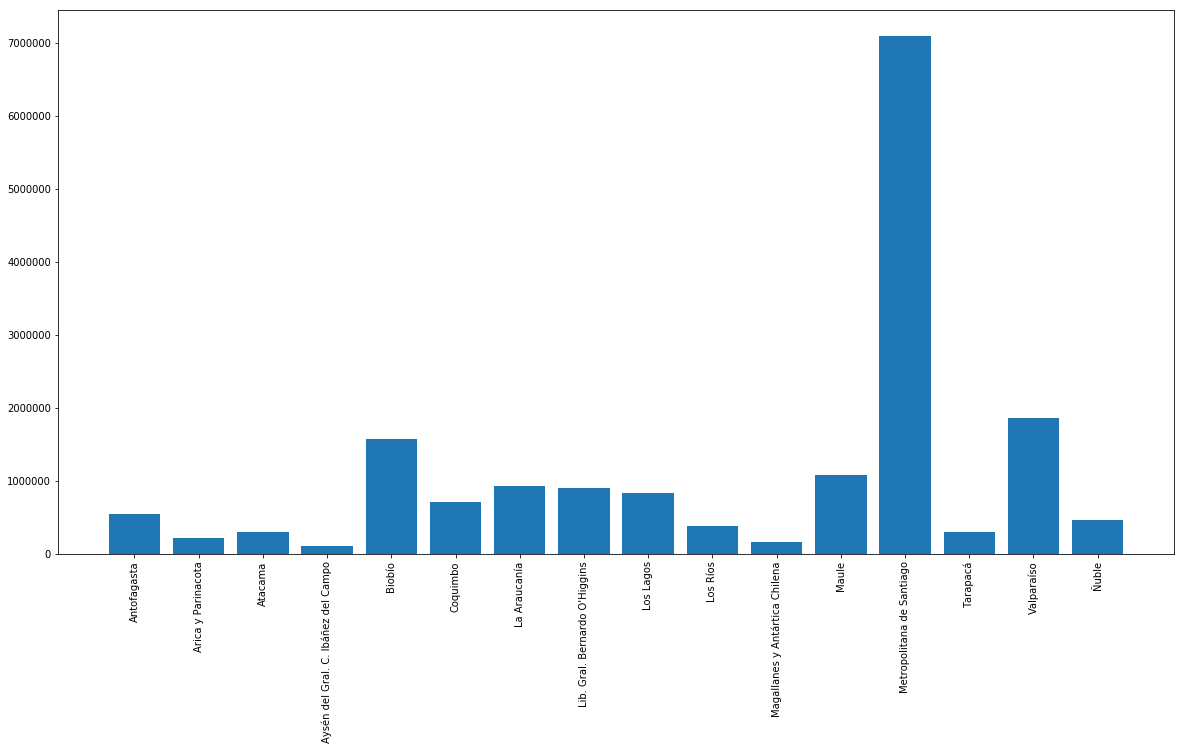

In [31]:
import matplotlib.pyplot as plt

# Ajustamos el tamaño del gráfico
plt.rcParams['figure.figsize'] = [20, 10]

pop_by_comune = com_frame['pobl'].groupby(com_frame['reg']).sum()
plt.bar(pop_by_comune.keys(), pop_by_comune)

# Ajustamos la rotación de los labels
plt.xticks(rotation=90)

plt

### Índices jerárquicos

Podemos instanciar objetos de la clase `DataFrame` en que los índices son jerárquicos. Veamos un ejemplo.

In [30]:
data_multindex = pd.DataFrame(np.arange(12).reshape(4, 3), 
                    index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                    columns=['c1', 'c2', 'c3']) 
# La función reshape en este 
# caso distribuye los doce elementos 
# en una tabla de 4 filas y tres columnas

data_multindex

c1  c2  c3
a 1   0   1   2
  2   3   4   5
b 1   6   7   8
  2   9  10  11

In [80]:
data_multindex.iloc[0] # Esto nos arroja la primera fila.

c1    0
c2    1
c3    2
Name: (a, 1), dtype: int64

Si queremos localizar por índice, usamos la función `loc`:

In [81]:
data_multindex.loc['a']

,c1,c2,c3
1,0,1,2
2,3,4,5


In [82]:
data_multindex.loc['a'].loc[2] # La función loc accede según el label del índice, no la posición

c1    3
c2    4
c3    5
Name: 2, dtype: int64

### Joins

Podemos hacer _joins_ sobre los Data Frames. Partamos con un ejemplo sencillo de dos objetos de tipo `DataFrame` que comparten el nombre de un atributo en el que se desea hacer _join_:

In [83]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': np.arange(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd', 'a'],
                    'data2': np.arange(8, 12)})

pd.merge(df1, df2)

,key,data1,data2
0,b,0,9
1,b,1,9
2,b,6,9
3,a,2,8
4,a,2,11
5,a,4,8
6,a,4,11
7,a,5,8
8,a,5,11


In [85]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


En la operación anterior, omitimos indicar explícitamente el atributo sobre el que estamos haciendo join. Para indicarlo hacemos lo siguiente:

In [86]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': np.arange(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd', 'a'],
                    'data2': np.arange(8, 12)})

pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,9
1,b,1,9
2,b,6,9
3,a,2,8
4,a,2,11
5,a,4,8
6,a,4,11
7,a,5,8
8,a,5,11


En el caso de que los atributos se llamen de distinta forma:

In [87]:
df1 = pd.DataFrame({'key1': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': np.arange(7)})
df2 = pd.DataFrame({'key2': ['a', 'b', 'd', 'a'],
                    'data2': np.arange(8, 12)})

pd.merge(df1, df2, left_on='key1', right_on='key2')

,key1,data1,key2,data2
0,b,0,b,9
1,b,1,b,9
2,b,6,b,9
3,a,2,a,8
4,a,2,a,11
5,a,4,a,8
6,a,4,a,11
7,a,5,a,8
8,a,5,a,11


En el caso de necesitar un _Outer Join_, podemos indicarlo con el argumento `how`. Puede ser `'left'`, `'right'` o `'outer'`. Veamos un ejemplo de _Left Outer Join_:

In [88]:
df1 = pd.DataFrame({'key1': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': np.arange(7)})
df2 = pd.DataFrame({'key2': ['a', 'b', 'd', 'a'],
                    'data2': np.arange(8, 12)})

pd.merge(df1, df2, left_on='key1', right_on='key2', how='left')

,key1,data1,key2,data2
0,b,0,b,9.0
1,b,1,b,9.0
2,a,2,a,8.0
3,a,2,a,11.0
4,c,3,NaN,NaN
5,a,4,a,8.0
6,a,4,a,11.0
7,a,5,a,8.0
8,a,5,a,11.0
9,b,6,b,9.0


En el caso de querer un _join_ por más de un argumento, puedo indicar una lista de atributos. También puedes renombrar atributos en el caso de que su nombre sea igual en ambos Data Frame y no quieras generar conflictos. Esto lo puedes hacer mediante el argumento `suffixes`. Para ver más puedes consultar la documentación.

Lo último que veremos es cómo hacer un _join_ utilizando una de los índices.

In [89]:
df1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                    'value': np.arange(6)})
df2 = pd.DataFrame({'dvalue': [10, 20]}, index=['a', 'b'])

In [90]:
df1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [91]:
df2

,dvalue
a,10
b,20


In [92]:
pd.merge(df1, df2, left_on='key', right_index=True)

,key,value,dvalue
0,a,0,10
2,a,2,10
3,a,3,10
1,b,1,20
4,b,4,20


También puedes utilizar `merge` con índices jerárquicos. Puedes buscar más información en la documentación de `pandas`.